# Zeta Zeros Exploration
- Code By Michael Sherif Naguib
- license: MIT open source
- Date: 3/20/19
- @University of Tulsa
- Description: i was curious what the difference between the imaginary part of the zeta function and rounded whole number was...

In [1]:

%matplotlib notebook

In [2]:
#imports
import numpy as np, pandas as pd, datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import inferno, viridis
from numba import jit
import numpy.random
from colorcet import palette
import math
from decimal import *
import bokeh.plotting as bp
from datashader.bokeh_ext import InteractiveImage
import bokeh.plotting as bp
from datashader.bokeh_ext import InteractiveImage
import tqdm
from PlottingUtil2 import PlottingUtil
import datashader.utils
#from copy import deepcopy
from random import random

In [3]:
unparsed_data_r=None
#100k ish datapoints of im solutions to zeta func available... courtesy of http://www.lmfdb.org/zeros/zeta/
with open("ZetaZerosIM.txt","r") as data_file:
    unparsed_data_r=data_file.readlines()
    unparsed_data_r=list(map(lambda x: float(x.split(" ")[1]),unparsed_data_r))   

unparsed_data_p=None
#10k ish datapoints available... prime nums  courtesy of https://www.math.utah.edu/~pa/math/p10000.html
with open("primes10k.txt","r") as data_file:
    unparsed_data_p=data_file.read().split(" ")
    unparsed_data_p=list(map(lambda x: int(x),unparsed_data_p))  
    
#for convenience... the data is now parsed
p = unparsed_data_p
r = unparsed_data_r[0:10000]#make sure same number avail = 10k

In [4]:
#memoized version of collatz path length
def c(n):
    return 3*n+1 if n%2==1 else int(n/2)
cache={1:0,0:0}#base case 1 has 0 path length to 1 ... case 0 is to handle any 0's passed to the func... tech. not defined...
def c_len(n):
    if n in cache:
        return cache[n]
    else:
        l=1
        res = c(n)
        while True:
            if res in cache:
                cache[n] = l + cache[res]
                return cache[n]
            else:
                x=c_len(res)#adds this to the cache
                res = c(res)
                l+=1
                
#for i in range(0,100):
#    print(str(c(i)))

In [92]:
#Function Setup
all_series=[]

In [32]:
#Query State by running
print("#Series: "+str(len(all_series)))

#Series: 1


In [93]:
#Each function should return a point based off some index i
def f(i):#i is the current index
    sd = (round(r[i])-r[i])#signed difference
    rr = round(r[i])#rounded reinman zero for 
    cl = c_len(rr)
    return (gcd(rr,cl),rr/sd)

In [94]:
n=10000
#generate data

allPoints = list(map(f,list(range(0,n))))
#if return tuple then extract cords
if type(allPoints[0]) == type((1,)):
    x = list(map(lambda p: p[0],allPoints))
    y = list(map(lambda p: p[1],allPoints))
    all_series.append([x,y])
else:#it is implicit that x is the regular axis
    x = list(range(0,len(allPoints)))
    y = list(allPoints)
    all_series.append([x,y])

NameError: name 'gcd' is not defined

<IPython.core.display.Javascript object>


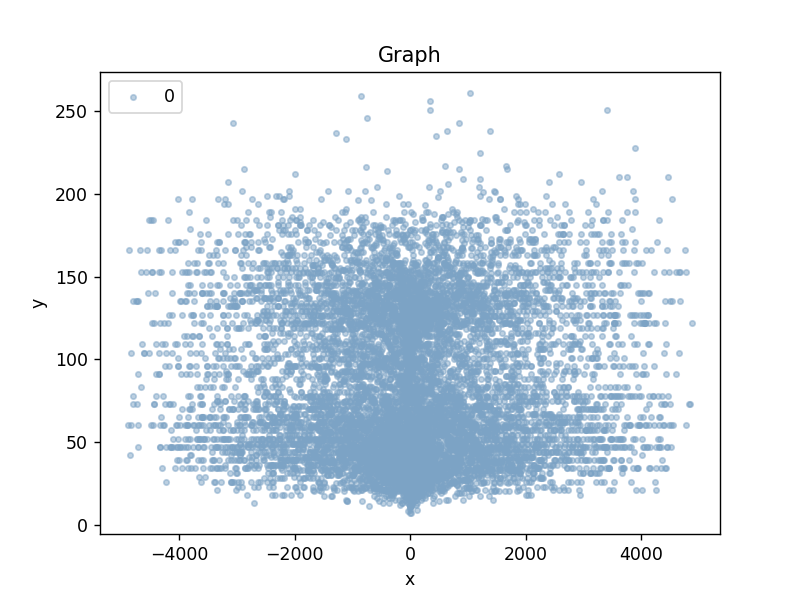

In [91]:
#Use the plotting Util to plot the data
PlottingUtil.plot(all_series)
#Observations and inquiries....

'''
Inq.1
running round(num)-num for a sample of 1k imaginary part non trivial 0's yeilds
what appears to be a compleatly chaotic ... output.

although... the output here does remind me of rsa encryption outputs... i wonder if there is any connection.... 
maybe it is 'encrypted' using two primes that are the closest together thus twin primes and both are always out of reach
... an informal way of saying an integer value for them is not obtainable... they are the last primes so to speak among the infinate #

Inq.2

(fnum-math.floor(fnum))*math.floor(fnum)
running a 1k sample....  it produces a really cool parabolic like shape... not necessarily parabolic... this is a guess
thought... pattern...
a%n =a mod n = (a/n-floor(a/n))*n  ==> r=a-floor(a/n)

let the expression (a/n - floor(a/n)) = (floor(fnum)-fnum)
where fnum is assumed to be in the form a/n where a,n are of the positive integer set

note r = a mod n = (a/n - floor(a/n))n
find n given a/n via brute force or search... note a/n is known not a or n...?

ex...

35.45345453  = a/n

a = a-r+r
(a-r)/n - r/n = 35.45 etc...
rn is known

rn*(a-r)-r*r = 35.45*rn
rna - r*r*n - r*r = 35.45*rn

x=rn
xa -xr -35.45x -r*r=0

x(a-35.45) -xr -r^2 =0

r= (x +- sqrt(x^2 - 4*(-1)*x(a-35.45)))/-2

2r = rn +- sqrt(rn*rn+4rn(a-35.45)
r and n are integer thus

sqrt(rn(rn+4(a-35.35))) is integer



'''